In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [4]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.3
1.3.4
0.11.2


## Dataset 1 : ANOVA testing for SalaryData.csv Dataset

In [5]:
salary = pd.read_csv('SalaryData.csv')

In [4]:
salary.shape

(40, 3)

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
salary.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [7]:
salary.describe(include= 'all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [8]:
salary.max()

Education      HS-grad
Occupation       Sales
Salary          260151
dtype: object

In [9]:
Education =salary[["Education", "Salary"]]
Education.head()

,Education,Salary
0,Doctorate,153197
1,Doctorate,115945
2,Doctorate,175935
3,Doctorate,220754
4,Doctorate,170769


In [10]:
salary.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [11]:
salary.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [12]:
Education.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [13]:
Occupation =salary[["Occupation", "Salary"]]
Occupation.head()

,Occupation,Salary
0,Adm-clerical,153197
1,Adm-clerical,115945
2,Adm-clerical,175935
3,Adm-clerical,220754
4,Sales,170769


In [14]:
formula = 'Salary ~ (Education)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [15]:
formula = 'Salary ~ (Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [16]:
from statsmodels.graphics.factorplots import interaction_plot

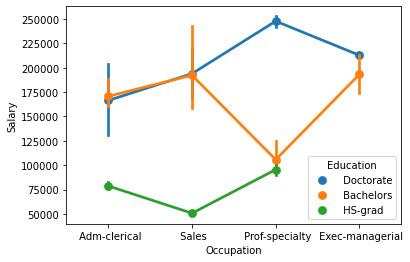

In [17]:
sns.pointplot(x = "Occupation",
              y = "Salary",
              hue = "Education",
              data = salary)
plt.show()

In [18]:
formula = 'Salary ~ (Education) + (Occupation) + (Education):(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN  


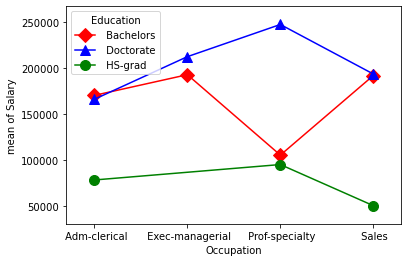

In [19]:
salary = interaction_plot(salary.Occupation, salary.Education, salary.Salary,
             colors=['red','blue','green'], markers=['D','^', 'o'], ms=10)